In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/projects/corr data.csv')

In [ ]:
df[:10]

,track_id,milliseconds,total_sales_volume
0,43,300355,6
1,2612,235755,1
2,2562,205897,6
3,2544,245368,4
4,1556,249939,2
5,1002,265848,4
6,496,391549,1
7,2205,169325,3
8,409,213995,1
9,1,343719,8


In [5]:
df.corr(method='pearson')

,track_id,milliseconds,total_sales_volume
track_id,1.000000,-0.024275,0.002994
milliseconds,-0.024275,1.000000,-0.095618
total_sales_volume,0.002994,-0.095618,1.000000


In [15]:
#removing any null values
df = df.dropna(subset=['milliseconds', 'total_sales_volume'])

In [16]:
#filling null values with mean.
df['milliseconds'] = df['milliseconds'].fillna(df['milliseconds'].mean())
df['total_sales_volume'] = df['total_sales_volume'].fillna(df['total_sales_volume'].mean())

In [17]:
import pandas as pd
from scipy.stats import pearsonr  # Import pearsonr


In [18]:
correlation, p_value = pearsonr(df['milliseconds'], df['total_sales_volume'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: -0.09561830482528494
P-value: 4.701080321757186e-05


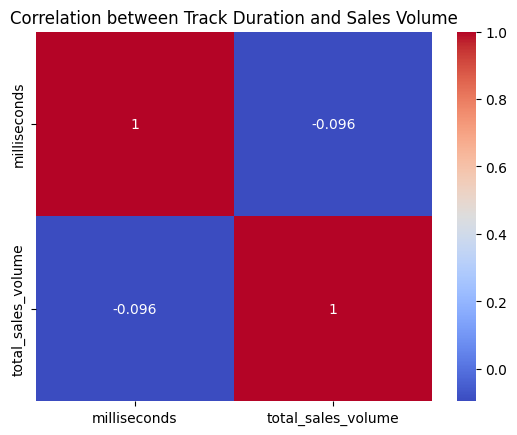

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the two columns
data = {'milliseconds': df['milliseconds'], 'total_sales_volume': df['total_sales_volume']}
df_corr = pd.DataFrame(data)

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Track Duration and Sales Volume')
plt.show()